In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
#from Deliverable_5_1.LinearMPC.MPCVelControl import MPCVelControl
from LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 15 iterations for X MPC.


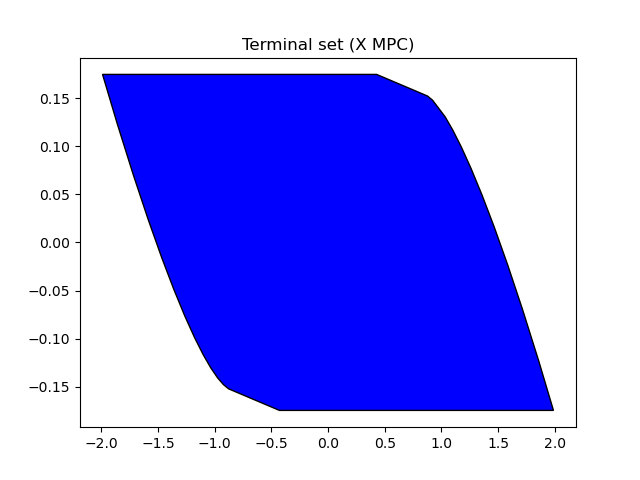

Maximum invariant set successfully computed after 15 iterations for Y MPC.


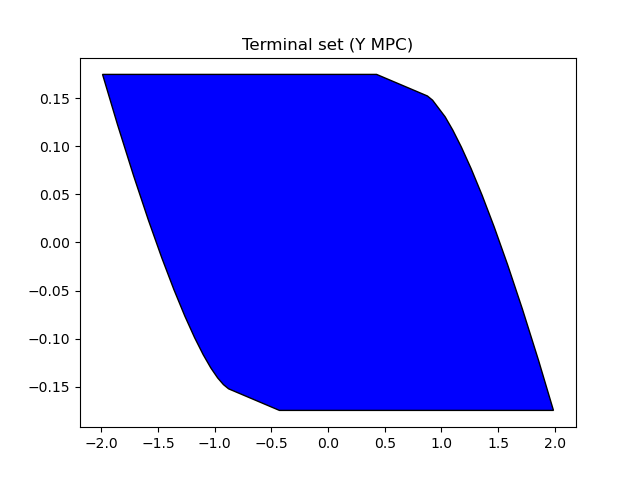

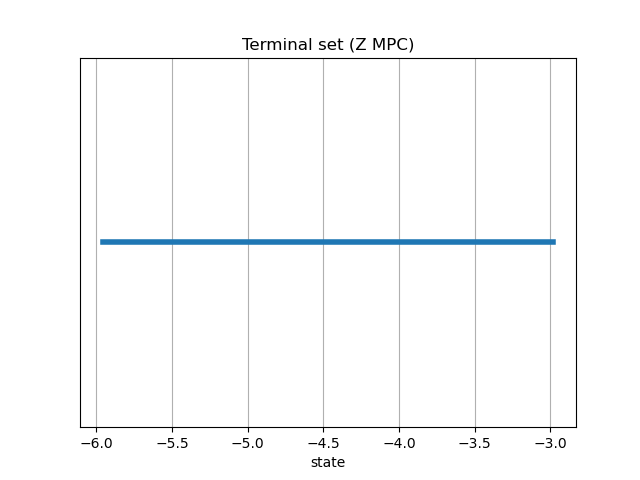

Maximum invariant set successfully computed after 46 iterations for Roll MPC.


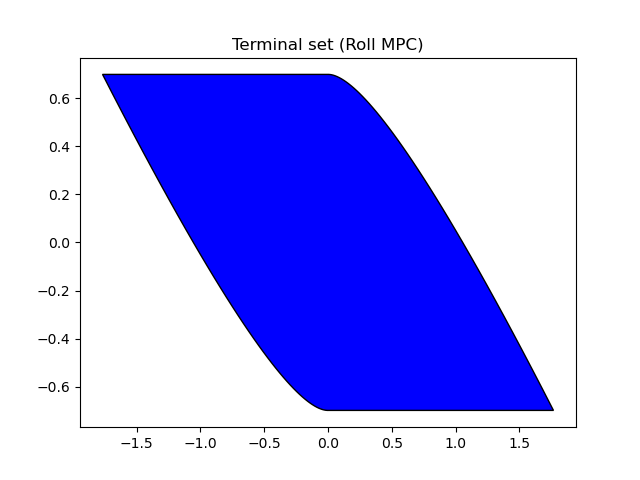

h_l[i] and h_u[i] are both close to -/+ infinity for i = 0 (and potentially other indices).
PIQP is setting the corresponding rows in G to zero (sparsity structure preserving).
Consider removing the corresponding constraints for faster solves.
/home/otto/.conda/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(






MPC problem: user_limit
[WARN] Input saturated: [-0.2618721] → [-0.26179939]
MPC problem: user_limit
[WARN] Input saturated: [0.26187679] → [0.26179939]

MPC problem: user_limit
[WARN] Input saturated: [-0.26187406] → [-0.26179939]
MPC problem: user_limit
[WARN] Input saturated: [0.26190334] → [0.26179939]

 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 



MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.17 < -0.17, 
 State alpha vi

In [3]:
Ts = 0.05
sim_time = 10; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state

x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 

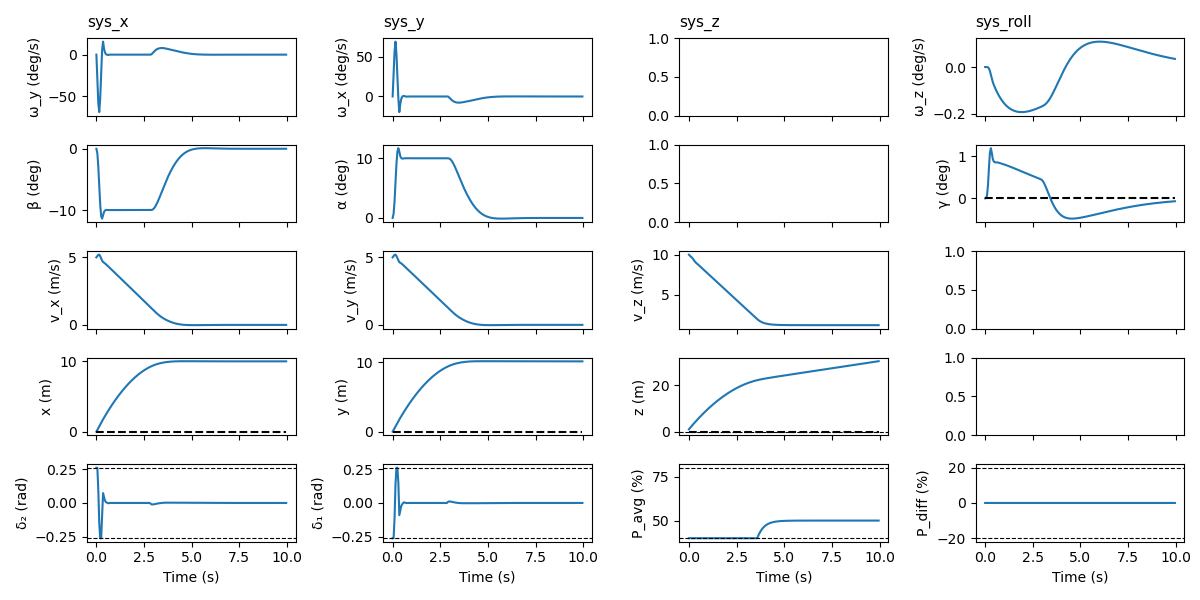

In [4]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])